In [ ]:
!pip install wordcloud

In [1]:
# import library
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

#Prev. 데이터셋 임포트

In [3]:
workspace_path = './'  # Change this path!
print(f'Current Workspace: {workspace_path}')

Current Workspace: ./


In [8]:
# (1) 'full_beauty' dataset import
ds_full_beauty = pd.read_csv(os.path.join(workspace_path, 'dataset/beauty.csv'))
ds_full_beauty.info() # 총 9,9988 개의 리뷰
ds_full_beauty.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   review      30000 non-null  object
 2   category    30000 non-null  object
 3   rawReview   30000 non-null  object
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


,Unnamed: 0,review,category,rawReview
0,60616,disregard claim hear commercial reduce stretch...,beauty,Disregard all the claims you've heard on comme...
1,72986,price pretty good find nozzle attachment fall ...,beauty,the price it's pretty good. I find the nozzle ...
2,15877,look like harden vasoline come tube smell like...,beauty,It looks like hardened Vasoline coming from th...
3,85030,absolutely love thing small face short eyebrow...,beauty,I absolutely love this the only thing is that ...
4,83073,love set brush two favorite brush set blush b...,beauty,I love this set of brushes! My two favorite br...


In [6]:
# (2) delete NULL
ds_full_beauty = ds_full_beauty[ds_full_beauty["review"].notnull()].reset_index(drop=True)

# 참고용 (NO RUN)

In [10]:
original_data = pd.read_csv(os.path.join(workspace_path, 'dataset/whole.csv'))
original_data.head()

,review,category
0,one reviewer mention watch 1 oz episode hooked...,movie
1,wonderful little production filming tech...,movie
2,think wonderful way spend time hot summer week...,movie
3,basically family little boy jake think zombi...,movie
4,petter mattei love time money visually stunni...,movie


In [11]:
category2id = {v:id for id, v in enumerate(original_data['category'].unique())}

In [12]:
processed = original_data[original_data["review"].notnull()].reset_index(drop=True)
processed

,review,category
0,one reviewer mention watch 1 oz episode hooked...,movie
1,wonderful little production filming tech...,movie
2,think wonderful way spend time hot summer week...,movie
3,basically family little boy jake think zombi...,movie
4,petter mattei love time money visually stunni...,movie
...,...,...
100481,set twenty curler slitted sit heated metal rac...,beauty
100482,well prettily package hot roller ever own gre...,beauty
100483,ok get read review it afraid order it sorta cr...,beauty
100484,use several similar product past curler set ea...,beauty


#EDA 1. 각 리뷰 별 단어의 개수

(`reference`: https://soyoung-new-challenge.tistory.com/35)

In [13]:
reviews = list(ds_full_beauty['review'])
# 공백을 기준으로 단어 분리
tokenized_reviews = [r.split() for r in reviews]

In [14]:
# 분리된 (리뷰) 단어 리스트 확인
# 전체 리스트는 배열 안의 배열 형태로 구성 (한 리뷰 인스턴스가 하나의 배열이다.)
tokenized_reviews[0]

['disregard',
 'claim',
 'hear',
 'commercial',
 'reduce',
 'stretch',
 'mark',
 'eliminate',
 'scar',
 'etc',
 'use',
 'practically',
 'whole',
 'bottle',
 'still',
 'see',
 'difference',
 'stretchmark',
 'scar',
 'appearancethat',
 'say',
 'product',
 'still',
 'nice',
 'product',
 'dry',
 'skin',
 'use',
 'bathingshowering',
 'sometimes',
 'use',
 'shave',
 'aid',
 'instead',
 'soap',
 'shave',
 'gel',
 'leave',
 'skin',
 'smooth',
 'moisturized',
 'product',
 'also',
 'mild',
 'cocoa',
 'smell',
 'badoil',
 'absorb',
 'skin',
 'well',
 'leave',
 'look',
 'greasy']

In [ ]:
# 각 리뷰 별 단어의 개수 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
review_len_by_token

Text(0, 0.5, '# of reviews')

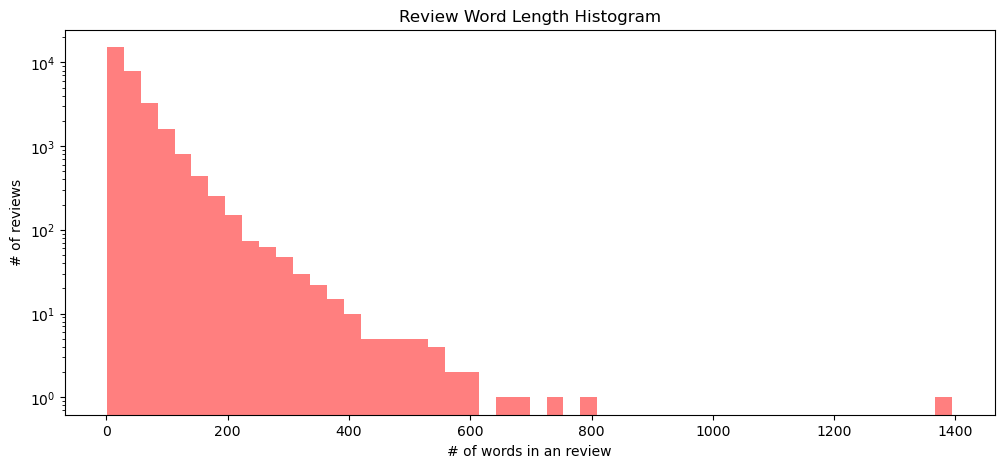

In [16]:
# 데이터셋에 있는 각 리뷰 별 단어의 개수 분포

plt.figure(figsize = (12,5))

plt.hist(review_len_by_token, bins = 50, alpha=0.5, color="r", label="word")

plt.yscale('log', nonpositive = 'clip')
plt.title('Review Word Length Histogram')
plt.xlabel('# of words in an review') # X축: 한 리뷰 내의 단어 개수
plt.ylabel('# of reviews') # Y축: 전체 리뷰의 개수

# EDA2. 각 리뷰 별 문장 길이

In [17]:
reviews = list(ds_full_beauty['review'])

# 각 리뷰 별 단어의 개수 저장
review_len_by_char = [len(r) for r in reviews]
review_len_by_char

[370,
 277,
 77,
 391,
 110,
 607,
 301,
 87,
 79,
 173,
 330,
 113,
 129,
 136,
 181,
 87,
 581,
 620,
 544,
 132,
 110,
 229,
 156,
 173,
 226,
 83,
 195,
 171,
 292,
 213,
 144,
 128,
 53,
 82,
 750,
 529,
 170,
 504,
 93,
 327,
 585,
 93,
 175,
 137,
 74,
 293,
 79,
 29,
 1046,
 334,
 310,
 792,
 293,
 111,
 153,
 118,
 264,
 146,
 277,
 128,
 94,
 113,
 160,
 151,
 102,
 69,
 2697,
 76,
 900,
 143,
 227,
 64,
 673,
 987,
 204,
 338,
 98,
 109,
 456,
 83,
 78,
 1419,
 704,
 229,
 105,
 314,
 92,
 137,
 74,
 225,
 151,
 245,
 113,
 121,
 674,
 58,
 164,
 2201,
 149,
 190,
 264,
 169,
 69,
 129,
 166,
 365,
 121,
 66,
 607,
 184,
 84,
 307,
 121,
 103,
 154,
 308,
 537,
 67,
 3420,
 520,
 128,
 173,
 95,
 157,
 103,
 93,
 59,
 93,
 189,
 1048,
 71,
 410,
 99,
 267,
 89,
 151,
 366,
 727,
 638,
 209,
 132,
 384,
 115,
 365,
 233,
 75,
 84,
 84,
 271,
 374,
 101,
 442,
 122,
 213,
 169,
 110,
 173,
 184,
 99,
 82,
 81,
 122,
 174,
 148,
 108,
 132,
 268,
 144,
 837,
 580,
 80,
 128,
 1

Text(0, 0.5, '# of reviews')

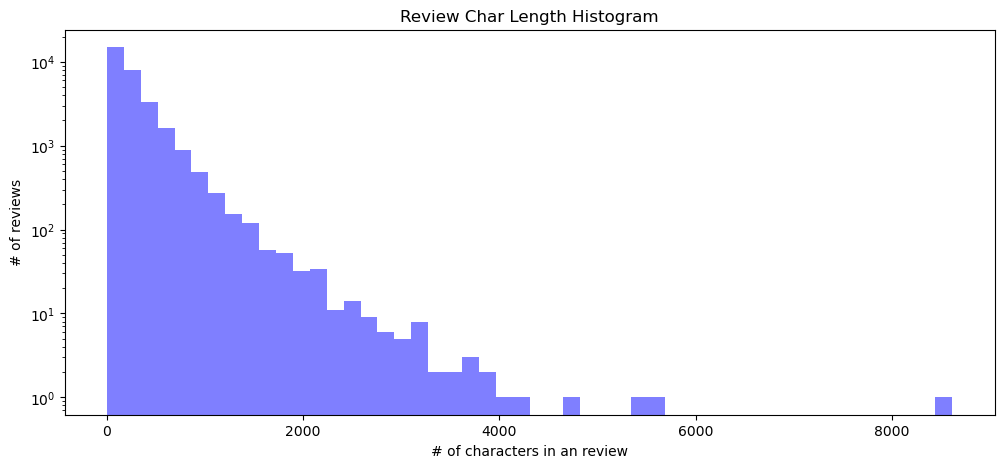

In [18]:
# 데이터셋에 있는 각 리뷰 별 문장의 길이 분포

plt.figure(figsize = (12,5))

plt.hist(review_len_by_char, bins = 50, alpha=0.5, color="b", label="character")

plt.yscale('log', nonpositive = 'clip')
plt.title('Review Char Length Histogram')
plt.xlabel('# of characters in an review') # X축: 한 리뷰 내의 단어 개수
plt.ylabel('# of reviews') # Y축: 전체 리뷰의 개수

# EDA3. 워드클라우드

In [23]:
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

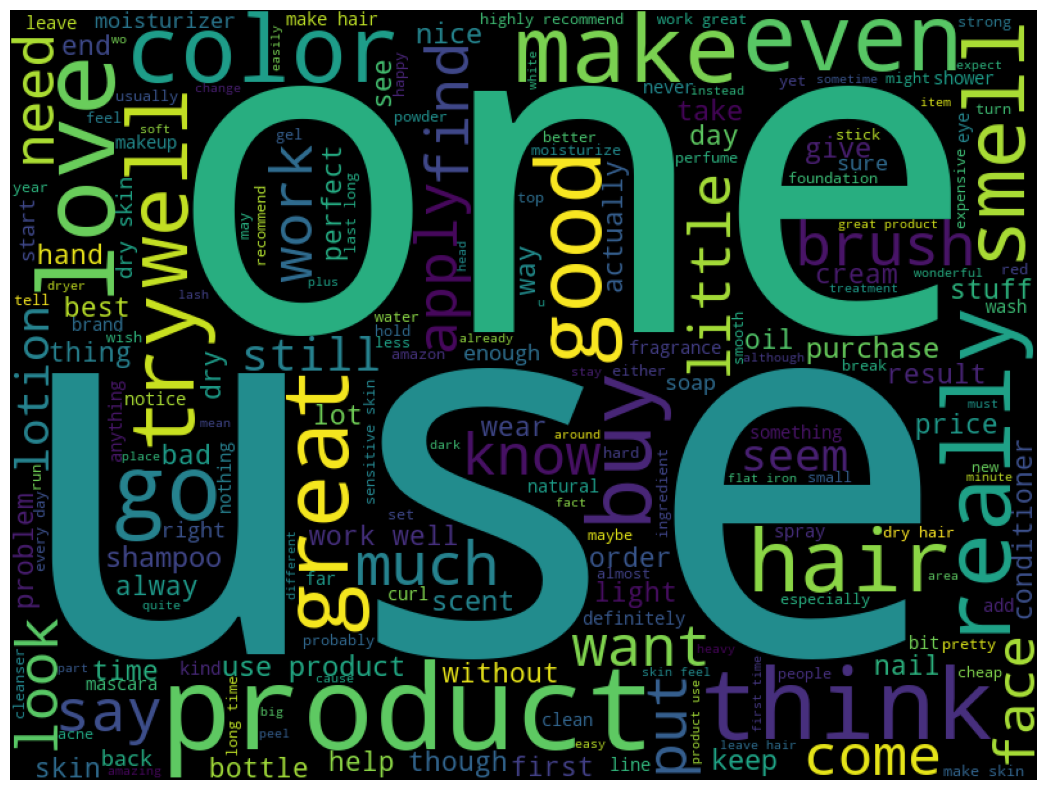

In [24]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=600)
wordcloud = wordcloud.generate(' '.join(ds_full_beauty['review']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# EDA 단어 빈도수


In [25]:
import nltk
from collections import Counter
import pandas as pd

reviews = list(ds_full_beauty['review'])

tokenized_reviews = []
for r in reviews:
  for splited in r.split():
    tokenized_reviews.append(splited)
#print(tokenized_reviews[:20])
counter = Counter(tokenized_reviews)

for idx, c in enumerate(counter.most_common(10000)):
  print(idx, c)
#print(counter.most_common(20))

0 ('use', 29760)
1 ('hair', 22880)
2 ('product', 20294)
3 ('skin', 15840)
4 ('like', 15018)
5 ('get', 12289)
6 ('good', 10028)
7 ('one', 9468)
8 ('make', 9461)
9 ('work', 9158)
10 ('great', 9106)
11 ('love', 8970)
12 ('look', 8885)
13 ('really', 8645)
14 ('would', 7930)
15 ('try', 7680)
16 ('smell', 7561)
17 ('dry', 7470)
18 ('go', 7244)
19 ('time', 7074)
20 ('color', 6972)
21 ('buy', 6759)
22 ('well', 6619)
23 ('face', 6047)
24 ('feel', 5957)
25 ('day', 5932)
26 ('also', 5707)
27 ('much', 5592)
28 ('little', 4995)
29 ('long', 4987)
30 ('think', 4830)
31 ('even', 4791)
32 ('find', 4701)
33 ('it', 4668)
34 ('leave', 4565)
35 ('give', 4390)
36 ('brush', 4255)
37 ('say', 4249)
38 ('recommend', 4229)
39 ('apply', 3917)
40 ('price', 3909)
41 ('nice', 3905)
42 ('oil', 3773)
43 ('first', 3685)
44 ('take', 3676)
45 ('need', 3656)
46 ('want', 3655)
47 ('wash', 3609)
48 ('last', 3562)
49 ('come', 3480)
50 ('scent', 3394)
51 ('put', 3390)
52 ('eye', 3387)
53 ('soft', 3375)
54 ('see', 3370)
55 ('s